In [1]:
from model import *
from data2 import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

Using TensorFlow backend.


In [2]:
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

/home/kshitija/dissertation/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [20]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")



results = model.predict_generator(testGene,1,verbose=1)
print(results.shape)
results = np.reshape(results, (results.shape[1], results.shape[2]))
print(results.shape)
thresholded = np.copy(results)
print(thresholded.shape)
#thresholded = np.reshape(thresholded, (thresholded.shape[1],thresholded.shape[2]))
print(thresholded.shape)
print(thresholded)
for i in range(0,256):
    for j in range(0,256):

        if(results[i][j]<0.139):
            thresholded[i][j]=1
        else:
            thresholded[i][j]=0
print(thresholded)
print(thresholded.shape)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_145 (Conv2D)             (None, 256, 256, 64) 640         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_146 (Conv2D)             (None, 256, 256, 64) 36928       conv2d_145[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_25 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_146[0][0]                 
__________________________________________________________________________________________________
conv2d_147

1/1 [==============================] - 1s 817ms/step
(1, 256, 256, 1)
(256, 256)
(256, 256)
(256, 256)
[[0.25133488 0.18341865 0.1611577  ... 0.2838065  0.32195026 0.36611995]
 [0.19165184 0.17060879 0.14825936 ... 0.23972148 0.2690077  0.28401458]
 [0.16232082 0.14052397 0.1405653  ... 0.2402317  0.2543412  0.2569465 ]
 ...
 [0.23733711 0.20257276 0.20887111 ... 0.20212644 0.24190119 0.26759836]
 [0.26576474 0.21864802 0.21929964 ... 0.2081816  0.25650978 0.2741805 ]
 [0.3259165  0.28538924 0.27234834 ... 0.2529753  0.27125952 0.30687344]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(256, 256)


In [5]:
from matplotlib import pyplot as plt
# print(thresholded.shape)
# thresholded = np.reshape(thresholded, (1,thresholded.shape[0],thresholded.shape[1],1))
results = np.reshape(results, (results.shape[1], results.shape[2]))


IndexError: tuple index out of range

In [22]:
print(thresholded)
print(thresholded.shape)

[[0.25133488 0.18341865 0.1611577  ... 0.2838065  0.32195026 0.36611995]
 [0.19165184 0.17060879 0.14825936 ... 0.23972148 0.2690077  0.28401458]
 [0.16232082 0.14052397 0.1405653  ... 0.2402317  0.2543412  0.2569465 ]
 ...
 [0.23733711 0.20257276 0.20887111 ... 0.20212644 0.24190119 0.26759836]
 [0.26576474 0.21864802 0.21929964 ... 0.2081816  0.25650978 0.2741805 ]
 [0.3259165  0.28538924 0.27234834 ... 0.2529753  0.27125952 0.30687344]]
(256, 256)


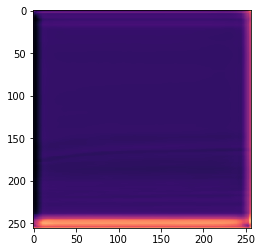

In [17]:
plt.imshow(results, cmap='magma')

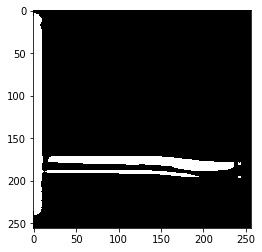

In [21]:
from matplotlib import pyplot as plt
plt.imshow(thresholded, cmap='gray')

In [22]:
plt.imsave('predict_1.png', thresholded, cmap='gray')